# Pymaceuticals Inc.
---

### Analysis

- The Capomulin and Ramicane drug treatments were the most effective at decreasing tumor size and increasing longevity.
    - These treatments resulted in the lowest average tumor volume (40.6 mm3 and 40.2 mm3 respectively compared to 52.3-55.2 mm3 for the remaining treatments).
    - These treatments resulted in the fewest mouse deaths, since they had the most timepoints recorded and therefore likely the fewest deaths at various timepoints.
- More male mice were used than female, but the difference was only 2% so gender is unlikely to be a factor in mouse death or tumor volume. 
    - The caveat to this is that it is unknown how many male vs female mice were used for each individual drug regimen and whether there was a difference in death or tumor volume based on mouse sex. These analyses should ideally be done for completeness, but overall there is likely no difference based on sex.
- For at least the capomulin regimen, the tumor volume is strongly tied to the weight of the mice (the correlation coefficient is 0.84).
    - This correlation may hold true for the other regimens
    - This means that the apparent efficacy of Capomulin may be due to smaller mice being treated
    - If this correlation holds true for the other regimens, the efficacy of Ramicane and Capomulin may be over-represented by the lower tumor volumes. However, the decreased mortality of the mice in these two regimens still points to them as the most effective treatments. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
all_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how='outer')

# Display the data table for preview
all_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
num_mice = len(all_data["Mouse ID"].unique())

# Shows the number of unique mice in the dataset
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_timepoints = all_data[all_data.duplicated(['Timepoint', 'Mouse ID'])]

# Shows the ID of the duplicated mouse
duplicate_timepoints["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse = all_data.loc[all_data['Mouse ID'] == 'g989']

# Shows the data for the duplicated mouse
duplicated_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
all_data.drop(all_data[all_data['Mouse ID'] == 'g989'].index, inplace=True)

# Shows the first 5 rows of the DataFrame
all_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(all_data["Mouse ID"].unique())

# Shows the number of mice
num_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group the data by regimen
regimens = all_data.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Calculate the properties:
average_volume = regimens.mean().rename('Mean Tumor Volume')
median_volume = regimens.median().rename('Median Tumor Volume')
variance_volume = regimens.var().rename('Tumor Volume Variance')
stdev_volume = regimens.std().rename('Tumor Volume Std. Dev.')
SEM_volume = regimens.sem().rename('Tumor Volume Std. Err.')

# Merges the series by Drug Regimen
summary_manual = pd.concat([average_volume, median_volume, variance_volume, stdev_volume, SEM_volume], axis=1)

# Displays the summary table
summary_manual

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_aggregation = all_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}, axis='columns')

# Displays the summary table
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

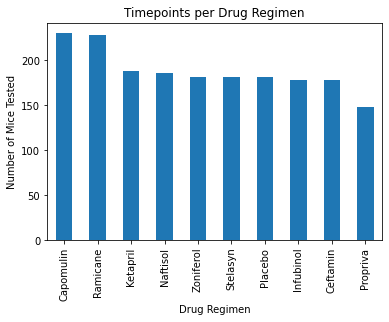

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Formats the desired data and plots it directly from the DataFrame
regimens.count().sort_values(ascending=False).plot.bar(title="Timepoints per Drug Regimen")

# Adds a label for the y-axis
plt.ylabel("Number of Mice Tested")

# Shows the plot
plt.show()

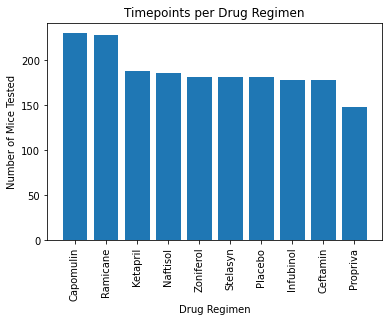

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Sets up desired values to plot
regimens_sorted = regimens.count().sort_values(ascending=False)

# Generates the bar chart using the counts as x-values and index as y
plt.bar(regimens_sorted.index, regimens_sorted)

# Formats the chart with axis labels, title, and rotates the x-tick labels
plt.xlabel('Drug Regimen')
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.title("Timepoints per Drug Regimen")

# Shows the plot
plt.show()

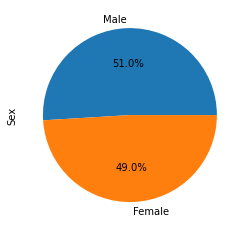

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Formats the desired data and plots it directly from the DataFrame
all_data.groupby('Sex')['Sex'].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%')

# Shows the plot
plt.show()

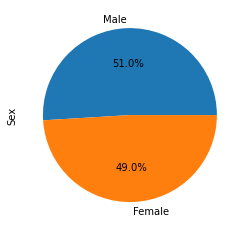

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Sets up data to plot
pie_data = all_data.groupby('Sex')['Sex'].count().sort_values(ascending=False)

# Plots the data
plt.pie(pie_data, labels=["Male", "Female"], autopct='%1.1f%%')

# Adds a ylabel
plt.ylabel("Sex")

# Shows the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = all_data.groupby('Mouse ID').max()["Timepoint"]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume = pd.merge(max_timepoint, all_data, on=["Mouse ID", "Timepoint"], how='left')

# Shows the DataFrame
final_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Creates an empty dictionary to fill with tumor vol data (for plotting)
tumor_vol = {}


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatments:
    # Locates the rows which contain mice on specified drug and get the tumor volumes
    tumor_volumes = final_volume.loc[final_volume["Drug Regimen"] == regimen]

    # Adds subset
    tumor_volumes = tumor_volumes.reset_index()["Tumor Volume (mm3)"]
    
    # Adds dataset to tumor_vol dictionary
    tumor_vol[regimen] = tumor_volumes
    
    # Calculates quartiles 1 and 3
    q3, q1 = np.percentile(tumor_volumes, [75, 25])
    # Calculates the IQR
    IQR = q3 - q1
    # Calculates lower bound
    lower_bound = q1-(IQR*1.5)
    # Calculates upper bound
    upper_bound = q3+(IQR*1.5)
    
    # Determines outliers
    outliers = [item for item in tumor_volumes if item > upper_bound or item < lower_bound]    
    
    # Prints outliers for drug regimen
    print(f"{regimen}'s potential outliers: {outliers}")

# Makes a DataFrame from the output dictionary for graphing
tumor_vol_df = pd.DataFrame(tumor_vol)

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.321345799999996]
Ceftamin's potential outliers: []


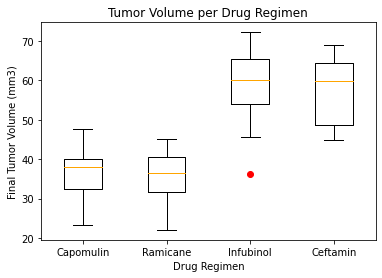

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_df.plot(kind='box', sym='ro', title="Tumor Volume per Drug Regimen", 
                  color=dict(boxes='black', whiskers='black', medians='orange', caps='black'))

# Adds labels to the axes
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")

# Shows the plot
plt.show()

## Line and Scatter Plots

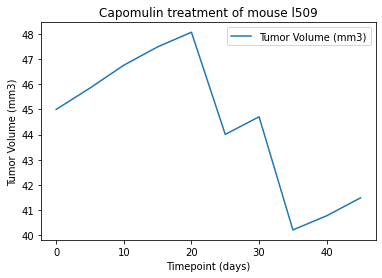

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Sets up mouse ID to use
mouse_id = 'l509'

# Gets all data for assigned mouse ID
mouse_data = all_data.loc[all_data['Mouse ID'] == mouse_id]

# Subsets only the desired columns
vol_time = mouse_data[['Timepoint', 'Tumor Volume (mm3)']].set_index('Timepoint')

# Plots the data
vol_time.plot(kind='line', title="Capomulin treatment of mouse l509")

# Adds axis labels
plt.xlabel("Timepoint (days)")
plt.ylabel('Tumor Volume (mm3)')

# Shows the plot
plt.show()

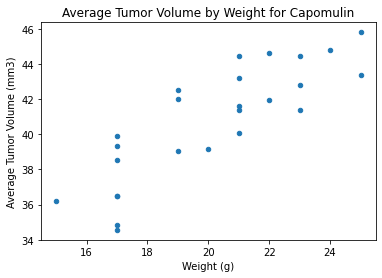

In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Gets all data for capomulin regimen
capomulin_data = all_data.loc[all_data['Drug Regimen'] == "Capomulin"]

# Groups by mouse and calculates the averages of each column by mouse
capomulin_data = capomulin_data.groupby("Mouse ID").mean()

# Plots the average tumor volume by weight
capomulin_data.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', 
                    title="Average Tumor Volume by Weight for Capomulin")

# Adds a y-axis label
plt.ylabel("Average Tumor Volume (mm3)")

# Shows the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


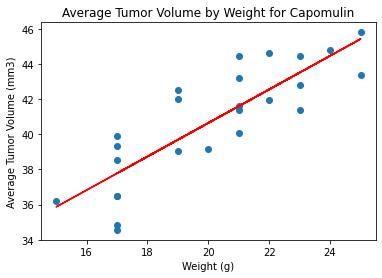

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculates the linear regression
res = st.linregress(capomulin_data['Weight (g)'], capomulin_data["Tumor Volume (mm3)"])

# Plots the initial data
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])

# Plots the linear regression
plt.plot(capomulin_data['Weight (g)'], res.intercept + res.slope*capomulin_data['Weight (g)'], 'r', label='fitted line')

# Adds labels and title to the plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight for Capomulin")

# Finds correlation coefficient between Weight and Tumor Volume
corr = round(capomulin_data['Weight (g)'].corr(capomulin_data['Tumor Volume (mm3)']), 2)

# Prints the correlation
print(f"The correlation between mouse weight and the average tumor volume is {corr}")